<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,45.227783,0.883173,56.110955,55.294002,0.816954
1,0.0,1.0,58.985068,-0.161594,68.823474,69.011114,-0.187640
2,0.0,2.0,85.354322,-0.068595,95.285727,95.303366,-0.017639
3,0.0,3.0,92.182843,-0.434914,101.747928,102.111946,-0.364018
4,0.0,4.0,54.257230,0.534478,64.791709,64.297082,0.494627
...,...,...,...,...,...,...,...
59995,999.0,55.0,96.085109,0.396305,106.481415,106.134856,0.346559
59996,999.0,56.0,98.135905,0.367473,108.503379,108.186905,0.316474
59997,999.0,57.0,41.398758,-0.249264,51.149494,51.415105,-0.265611
59998,999.0,58.0,32.704356,-0.509433,42.194923,42.715393,-0.520470


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    45.227783  0.883173   56.110955   55.294002  0.816954
      1.0    58.985068 -0.161594   68.823474   69.011114 -0.187640
      2.0    85.354322 -0.068595   95.285727   95.303366 -0.017639
      3.0    92.182843 -0.434914  101.747928  102.111946 -0.364018
      4.0    54.257230  0.534478   64.791709   64.297082  0.494627
...                ...       ...         ...         ...       ...
999.0 55.0   96.085109  0.396305  106.481415  106.134856  0.346559
      56.0   98.135905  0.367473  108.503379  108.186905  0.316474
      57.0   41.398758 -0.249264   51.149494   51.415105 -0.265611
      58.0   32.704356 -0.509433   42.194923   42.715393 -0.520470
      59.0   97.210141  0.398074  107.608215  107.260575  0.347640

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    45.227783  0.883173   56.110955   55.294002  0.816954
      1.0    58.985068 -0.161594   68.823474   69.011114 -0.187640
      2.0    85.354322 -0.068595   95.285727   95.303366 -0.017639
      3.0    92.182843 -0.434914  101.747928  102.111946 -0.364018
      4.0    54.257230  0.534478   64.791709   64.297082  0.494627
...                ...       ...         ...         ...       ...
999.0 55.0   96.085109  0.396305  106.481415  106.134856  0.346559
      56.0   98.135905  0.367473  108.503379  108.186905  0.316474
      57.0   41.398758 -0.249264   51.149494   51.415105 -0.265611
      58.0   32.704356 -0.509433   42.194923   42.715393 -0.520470
      59.0   97.210141  0.398074  107.608215  107.260575  0.347640

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,45.227783,0.883173,56.110955,55.294002,0.816954
1,0.0,1.0,58.985068,-0.161594,68.823474,69.011114,-0.187640
2,0.0,2.0,85.354322,-0.068595,95.285727,95.303366,-0.017639
3,0.0,3.0,92.182843,-0.434914,101.747928,102.111946,-0.364018
4,0.0,4.0,54.257230,0.534478,64.791709,64.297082,0.494627
...,...,...,...,...,...,...,...
59995,999.0,55.0,96.085109,0.396305,106.481415,106.134856,0.346559
59996,999.0,56.0,98.135905,0.367473,108.503379,108.186905,0.316474
59997,999.0,57.0,41.398758,-0.249264,51.149494,51.415105,-0.265611
59998,999.0,58.0,32.704356,-0.509433,42.194923,42.715393,-0.520470


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    45.227783  0.883173   56.110955   55.294002  0.816954
      1.0    58.985068 -0.161594   68.823474   69.011114 -0.187640
      2.0    85.354322 -0.068595   95.285727   95.303366 -0.017639
      3.0    92.182843 -0.434914  101.747928  102.111946 -0.364018
      4.0    54.257230  0.534478   64.791709   64.297082  0.494627
...                ...       ...         ...         ...       ...
999.0 55.0   96.085109  0.396305  106.481415  106.134856  0.346559
      56.0   98.135905  0.367473  108.503379  108.186905  0.316474
      57.0   41.398758 -0.249264   51.149494   51.415105 -0.265611
      58.0   32.704356 -0.509433   42.194923   42.715393 -0.520470
      59.0   97.210141  0.398074  107.608215  107.260575  0.347640

[60000 rows x 5 columns]

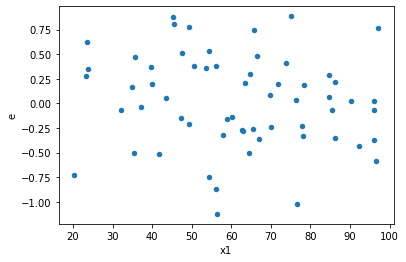

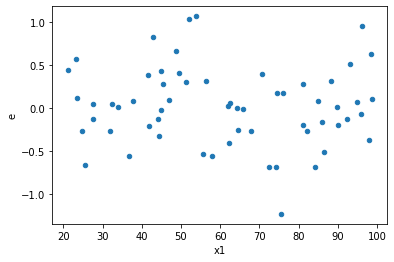

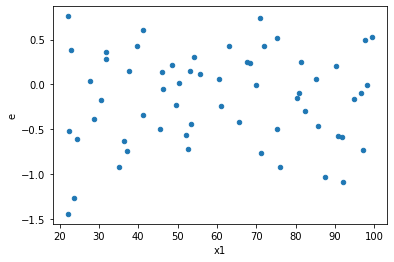

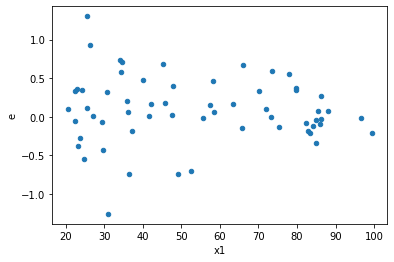

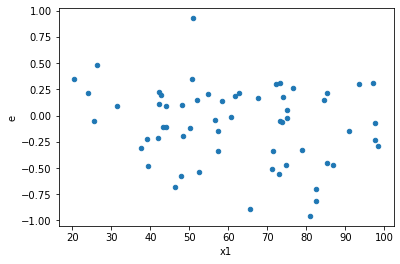

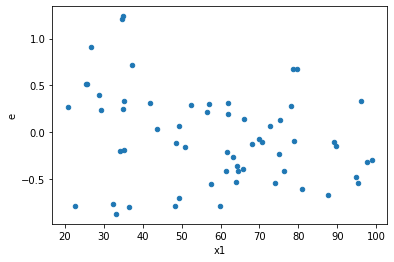

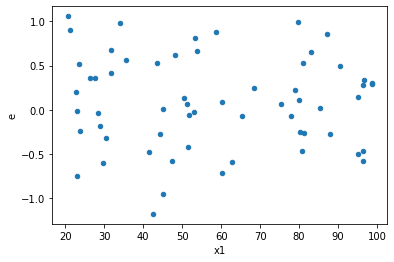

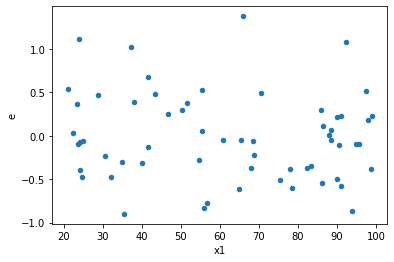

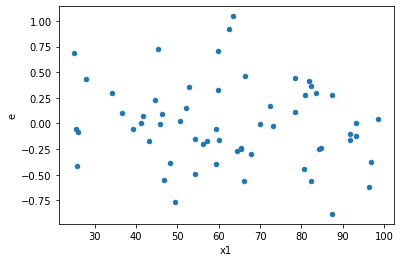

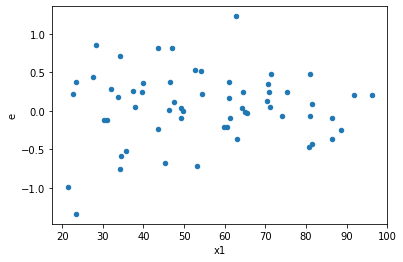

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,30.0,28.0,5.215657156578152,5.732367294672074,0.17385523855260507,0.2047274033811455,1.177573969502214,0.6663652802737847,0.6668173598631076,0.33318264013689236,Reject001=1 : Homoscedasticity
2.0,29.0,29.0,6.92783679338676,8.163543584063543,0.23889092390988828,0.2815015028987429,1.1783683460696384,0.6614591680450292,0.6692704159774854,0.3307295840225146,Reject001=1 : Homoscedasticity
3.0,26.0,32.0,1.535503115105219,8.944286840025075,0.0590578121194315,0.2795089637507836,4.732802549229861,5.00794303990304e-05,0.9999749602848005,2.50397151995152e-05,Reject001=0 : Heteroscedasticity
4.0,31.0,27.0,3.3708806240896116,4.065096249792604,0.10873808464805199,0.15055912036268904,1.384603387580326,0.3936962022658761,0.803151898867062,0.19684810113293805,Reject001=1 : Homoscedasticity
7.0,31.0,27.0,7.151214168933707,7.265587190815476,0.2306843280301196,0.26909582188205466,1.166511068090069,0.6886866866848922,0.6556566566575539,0.3443433433424461,Reject001=1 : Homoscedasticity
8.0,28.0,30.0,4.365311819401642,4.683738001962193,0.15590399355005863,0.15612460006540643,1.0014150151662213,0.9935651317285181,0.5032174341357409,0.49678256586425906,Reject001=1 : Homoscedasticity
9.0,27.0,31.0,3.152736268560447,8.667928909357224,0.11676800994668322,0.2796106099792653,2.3945823013249665,0.02027536957036924,0.9898623152148154,0.01013768478518462,Reject001=1 : Homoscedasticity
12.0,23.0,35.0,3.097197623582633,9.024591827273785,0.1346607662427232,0.257845480779251,1.9147780602591402,0.08076421926151522,0.9596178903692424,0.04038210963075761,Reject001=1 : Homoscedasticity
13.0,22.0,36.0,4.285532858505968,9.815399503121196,0.19479694811390766,0.272649986197811,1.3996625144166976,0.36194652322242904,0.8190267383887855,0.18097326161121452,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,30.0,7.547256871227807,5.3498275999362015,0.269544888258136,0.17832758666454004,0.6615877148215864,0.27508315944723205,Reject001=1 : Homoscedasticity
1.0,30.0,28.0,5.215657156578152,5.732367294672074,0.17385523855260507,0.2047274033811455,1.177573969502214,0.6663652802737847,Reject001=1 : Homoscedasticity
2.0,29.0,29.0,6.92783679338676,8.163543584063543,0.23889092390988828,0.2815015028987429,1.1783683460696384,0.6614591680450292,Reject001=1 : Homoscedasticity
3.0,26.0,32.0,1.535503115105219,8.944286840025075,0.0590578121194315,0.2795089637507836,4.732802549229861,5.00794303990304e-05,Reject001=0 : Heteroscedasticity
4.0,31.0,27.0,3.3708806240896116,4.065096249792604,0.10873808464805199,0.15055912036268904,1.384603387580326,0.3936962022658761,Reject001=1 : Homoscedasticity
5.0,24.0,34.0,8.80390316994697,4.683253989232146,0.3668292987477904,0.13774276438918076,0.3754955366416474,0.014652211867878087,Reject001=1 : Homoscedasticity
6.0,34.0,24.0,11.245265981691675,4.567180359394188,0.3307431171085787,0.19029918164142448,0.5753685316418897,0.13645361857384988,Reject001=1 : Homoscedasticity
7.0,31.0,27.0,7.151214168933707,7.265587190815476,0.2306843280301196,0.26909582188205466,1.166511068090069,0.6886866866848922,Reject001=1 : Homoscedasticity
8.0,28.0,30.0,4.365311819401642,4.683738001962193,0.15590399355005863,0.15612460006540643,1.0014150151662213,0.9935651317285181,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      957
Reject001=0 : Heteroscedasticity     43
Name: Result_test, dtype: int64